In [154]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns  

In [155]:
df = pd.read_json("all_results.json", orient='index')
df.rename(columns={'Trip':'Trial'}, inplace=True)

In [156]:
#added prefix 0 to some Algs
algdi = {"SHORT_70":"SHORT_070","SHORT_80":"SHORT_080","SHORT_90":"SHORT_090",
     "HEURISTIC_70":"HEURISTIC_070","HEURISTIC_80":"HEURISTIC_080","HEURISTIC_90":"HEURISTIC_090"}
mazedi = {"test_maze_01.txt":"maze_01","test_maze_02.txt":"maze_02","test_maze_03.txt":"maze_03",
          "test_maze_04.txt":"maze_04","test_maze_05.txt":"maze_05","test_maze_06.txt":"maze_06",
          "test_maze_07.txt":"maze_07", "test_maze_08.txt":"maze_08"
         }
df['Alg'] = df['Alg'].map(algdi).fillna(df['Alg'])
df['Maze'] = df['Maze'].map(mazedi).fillna(df['Maze'])
df

,Alg,Trial,Maze,Run1,Run2,Score,Coverage
0,SHORT_100,1,maze_01,198,17,23.60,100.0
1,SHORT_100,2,maze_01,202,17,23.73,100.0
2,SHORT_100,3,maze_01,184,17,23.13,100.0
3,SHORT_100,4,maze_01,199,17,23.63,100.0
4,SHORT_100,5,maze_01,203,17,23.77,100.0
...,...,...,...,...,...,...,...
7995,HEURISTIC_GOALS,96,maze_08,238,24,31.93,77.7
7996,HEURISTIC_GOALS,97,maze_08,281,23,32.37,86.3
7997,HEURISTIC_GOALS,98,maze_08,280,24,33.33,85.9
7998,HEURISTIC_GOALS,99,maze_08,199,23,29.63,66.8


In [157]:
# create list of dataframe for filtered by the maze
df_list = []
for idx,maze in enumerate(df.Maze.unique()):
    df_list.append((df[(df.Maze == maze)],maze))

## Select particular Maze

,count,mean,std,min,50%,75%,95%,max
Alg,,,,,,,,
HEURISTIC_100,100.0,345.98,8.576430,325.0,346.0,351.25,360.05,364.0
HEURISTIC_GOALS,100.0,114.16,41.562347,71.0,98.0,125.25,203.35,252.0
SHORT_100,100.0,352.93,11.528844,334.0,351.0,361.25,375.05,380.0
SHORT_GOALS,100.0,159.66,65.717827,68.0,141.0,213.25,274.60,327.0


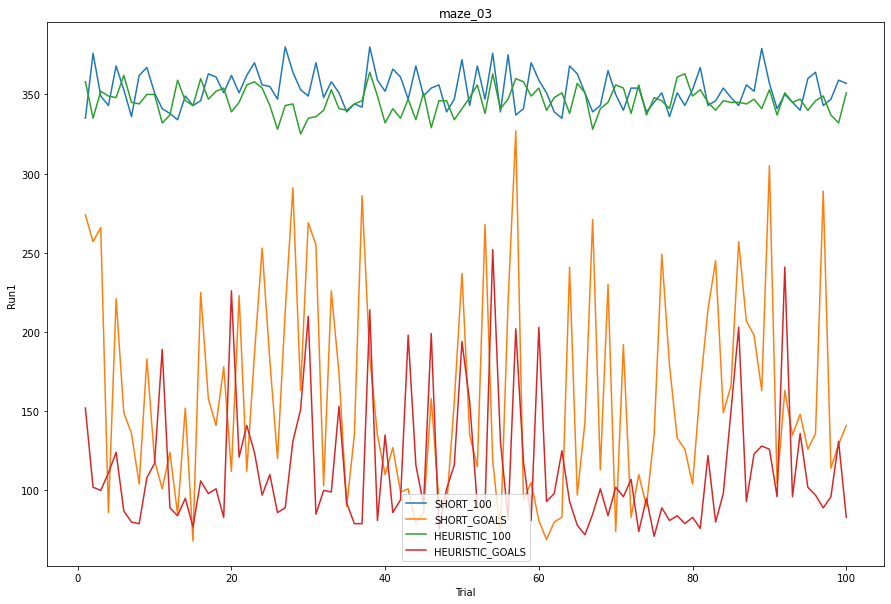

In [158]:
# maze01 = 0, maze02 = 2, and so on...
select = 2

df_sel, maze_sel = df_list[select]

data = df_sel[df_sel.Alg.isin (['SHORT_100', 'SHORT_GOALS', 'HEURISTIC_100', 'HEURISTIC_GOALS'])]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trial", y="Run1", hue="Alg",
             data=data).set_title(maze_sel)
plt.legend(loc = 'lower center')

data.groupby(['Alg']).Run1.describe(percentiles=[0.75, 0.95])


,count,mean,std,min,50%,75%,95%,max
Alg,,,,,,,,
HEURISTIC_100,100.0,25.00,0.000000,25.0,25.0,25.0,25.0,25.0
HEURISTIC_GOALS,100.0,29.65,3.370625,25.0,29.0,31.0,35.0,40.0
SHORT_100,100.0,25.00,0.000000,25.0,25.0,25.0,25.0,25.0
SHORT_GOALS,100.0,27.46,3.069630,25.0,27.0,28.0,35.0,39.0


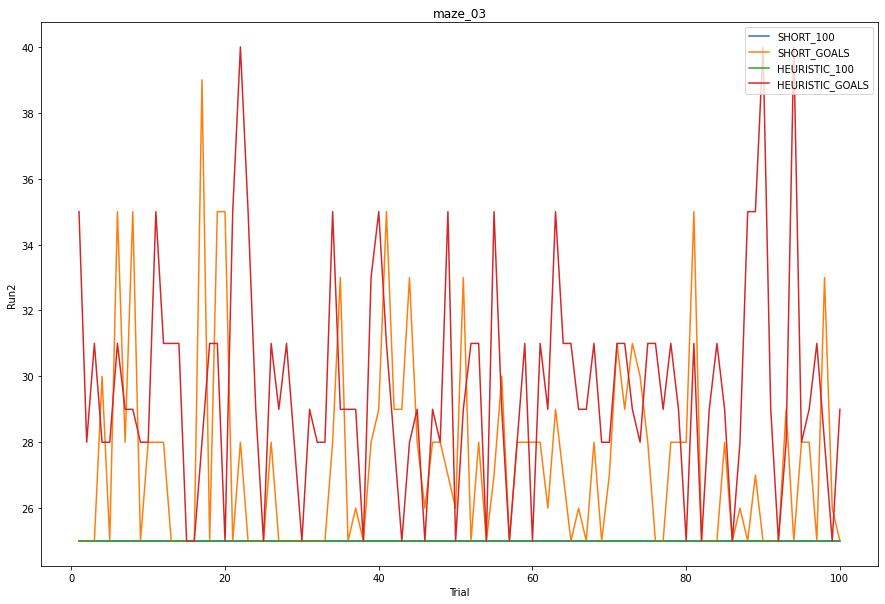

In [159]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trial", y="Run2", hue= "Alg",
             data=data).set_title(maze_sel)
plt.legend(loc = 'upper right')

data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

,count,mean,std,min,50%,75%,95%,max
Alg,,,,,,,,
HEURISTIC_GOALS,100.0,39.829,12.966938,27.0,34.2,44.600,68.135,80.5
SHORT_GOALS,100.0,53.605,18.505999,25.8,49.8,68.775,87.540,97.3


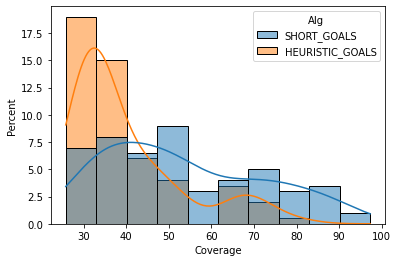

In [160]:
data = df_sel[df_sel.Alg.isin(['SHORT_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

,count,mean,std,min,50%,75%,95%,max
Alg,,,,,,,,
HEURISTIC_GOALS,100.0,29.65,3.370625,25.0,29.0,31.0,35.0,40.0
SHORT_GOALS,100.0,27.46,3.069630,25.0,27.0,28.0,35.0,39.0


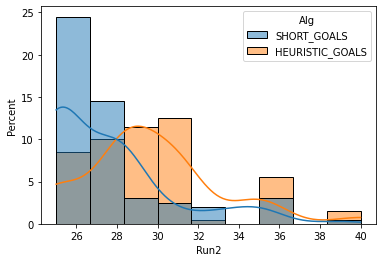

In [161]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

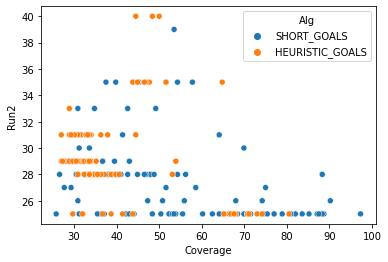

In [162]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")

In [163]:
df_sel = df_sel.round(decimals = 1)
print("Score for maze_03 \n",df_sel.groupby(['Alg']).Score.describe(percentiles=[0.75, 0.95]))

Score for maze_03 
                  count    mean       std   min    50%     75%     95%   max
Alg                                                                        
HEURISTIC_070    100.0  33.836  2.123201  31.8  32.50  35.300  38.400  38.6
HEURISTIC_080    100.0  34.467  1.828785  32.6  33.50  36.300  37.410  39.6
HEURISTIC_090    100.0  34.828  0.884785  34.1  34.50  34.900  37.605  38.1
HEURISTIC_100    100.0  36.533  0.287467  35.8  36.50  36.700  37.000  37.1
HEURISTIC_GOALS  100.0  33.459  3.344076  27.6  32.15  34.100  40.100  44.7
SHORT_070        100.0  33.482  1.865496  31.5  32.70  35.000  35.915  42.6
SHORT_080        100.0  33.857  1.304402  32.6  33.40  33.900  36.315  39.4
SHORT_090        100.0  34.661  0.439902  33.8  34.60  35.000  35.400  35.8
SHORT_100        100.0  36.764  0.385997  36.1  36.70  37.025  37.500  37.7
SHORT_GOALS      100.0  32.783  3.010019  27.3  32.40  33.900  38.725  44.3


In [164]:
df_sel = df_sel[df_sel.Alg.str.contains("GOALS") == False]
df_sel = df_sel.round(decimals = 1)
print("Run2 timesteps for maze_01\n",df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95]))

Run2 timesteps for maze_01
                count   mean       std   min   50%   75%   95%   max
Alg                                                                
HEURISTIC_070  100.0  26.61  2.078728  25.0  25.0  28.0  31.0  31.0
HEURISTIC_080  100.0  26.16  1.721639  25.0  25.0  28.0  29.0  31.0
HEURISTIC_090  100.0  25.21  0.769297  25.0  25.0  25.0  28.0  28.0
HEURISTIC_100  100.0  25.00  0.000000  25.0  25.0  25.0  25.0  25.0
SHORT_070      100.0  26.00  1.639167  25.0  25.0  28.0  28.0  34.0
SHORT_080      100.0  25.47  1.234643  25.0  25.0  25.0  28.0  31.0
SHORT_090      100.0  25.00  0.000000  25.0  25.0  25.0  25.0  25.0
SHORT_100      100.0  25.00  0.000000  25.0  25.0  25.0  25.0  25.0


## Overall Results

In [165]:
df

,Alg,Trial,Maze,Run1,Run2,Score,Coverage
0,SHORT_100,1,maze_01,198,17,23.60,100.0
1,SHORT_100,2,maze_01,202,17,23.73,100.0
2,SHORT_100,3,maze_01,184,17,23.13,100.0
3,SHORT_100,4,maze_01,199,17,23.63,100.0
4,SHORT_100,5,maze_01,203,17,23.77,100.0
...,...,...,...,...,...,...,...
7995,HEURISTIC_GOALS,96,maze_08,238,24,31.93,77.7
7996,HEURISTIC_GOALS,97,maze_08,281,23,32.37,86.3
7997,HEURISTIC_GOALS,98,maze_08,280,24,33.33,85.9
7998,HEURISTIC_GOALS,99,maze_08,199,23,29.63,66.8


In [166]:
df.rename(columns={'Alg':'Run1 algorithm'}, inplace = True)
df.groupby(['Run1 algorithm', 'Maze']).Score.describe(percentiles=[0.95])

count     mean       std    min     50%      95%  \
Run1 algorithm Maze                                                        
HEURISTIC_070  maze_01  100.0  22.8708  1.096126  20.83  22.930  24.3320   
               maze_02  100.0  30.2097  3.163097  27.47  28.485  36.9015   
               maze_03  100.0  33.8384  2.126224  31.77  32.515  38.4000   
               maze_04  100.0  24.5429  1.495414  22.77  24.130  27.6115   
               maze_05  100.0  35.1348  2.246815  31.67  34.735  38.6750   
...                       ...      ...       ...    ...     ...      ...   
SHORT_GOALS    maze_04  100.0  24.2496  2.249353  20.27  24.270  27.0100   
               maze_05  100.0  32.7450  2.324845  28.37  32.970  35.5235   
               maze_06  100.0  35.8973  3.473820  27.53  35.915  41.1185   
               maze_07  100.0   6.4529  0.182221   6.23   6.430   6.8000   
               maze_08  100.0  31.7382  2.031421  26.57  31.930  34.6085   

                          max  
Run1 algorithm Maze            
HEURISTIC_070  maze_01  27.93  
               maze_02  37.37  
               maze_03  38.63  
               maze_04  28.80  
               maze_05  39.03  
...                       ...  
SHORT_GOALS    maze_04  34.70  
               maze_05  40.33  
               maze_06  42.33  
               maze_07   7.07  
               maze_08  35.27  

[80 rows x 7 columns]

In [167]:
quantile = df.groupby(['Run1 algorithm', 'Maze']).Score.quantile(0.95)

In [168]:
summary = quantile.unstack()
summary.rename(columns={'Alg':'Run1 algorithm'}, inplace = True)
summary

Maze,maze_01,maze_02,maze_03,maze_04,maze_05,maze_06,maze_07,maze_08
Run1 algorithm,,,,,,,,
HEURISTIC_070,24.3320,36.9015,38.4000,27.6115,38.6750,40.6320,12.5715,34.2320
HEURISTIC_080,24.0015,33.7320,37.3815,28.1035,38.6715,41.6320,13.5700,34.3065
HEURISTIC_090,24.6035,31.0035,37.5780,25.8830,35.4035,38.4115,14.5320,34.4320
HEURISTIC_100,24.0700,31.4700,37.0015,26.1320,35.8015,37.0000,15.8015,35.4780
HEURISTIC_GOALS,25.0865,36.3000,40.0715,27.8035,38.4320,44.2400,6.2300,34.1750
SHORT_070,23.9035,32.1700,35.9420,27.2300,35.8685,40.7000,12.1715,34.8335
SHORT_080,23.7300,31.1565,36.3450,26.3820,35.6150,41.0880,13.0715,34.5100
SHORT_090,24.1715,30.7320,35.3715,25.6370,34.9535,37.4515,14.1000,34.2085
SHORT_100,23.8700,31.5320,37.5015,26.0700,35.8700,37.4730,15.5000,35.3320


In [169]:
summary.columns

Index(['maze_01', 'maze_02', 'maze_03', 'maze_04', 'maze_05', 'maze_06',
       'maze_07', 'maze_08'],
      dtype='object', name='Maze')

In [170]:
stds=[]
for column in summary.columns:
    std = summary[column].std()
    stds.append(std)
    
stds


[0.4220844438945576,
 2.2428780964545427,
 1.3950545041124538,
 0.878070620103469,
 1.482848156607939,
 2.318110378088154,
 3.3322306942947395,
 0.46568282004910694]

In [171]:
summary.loc['Standard Deviation'] = stds
summary

Maze,maze_01,maze_02,maze_03,maze_04,maze_05,maze_06,maze_07,maze_08
Run1 algorithm,,,,,,,,
HEURISTIC_070,24.332000,36.901500,38.400000,27.611500,38.675000,40.63200,12.571500,34.232000
HEURISTIC_080,24.001500,33.732000,37.381500,28.103500,38.671500,41.63200,13.570000,34.306500
HEURISTIC_090,24.603500,31.003500,37.578000,25.883000,35.403500,38.41150,14.532000,34.432000
HEURISTIC_100,24.070000,31.470000,37.001500,26.132000,35.801500,37.00000,15.801500,35.478000
HEURISTIC_GOALS,25.086500,36.300000,40.071500,27.803500,38.432000,44.24000,6.230000,34.175000
SHORT_070,23.903500,32.170000,35.942000,27.230000,35.868500,40.70000,12.171500,34.833500
SHORT_080,23.730000,31.156500,36.345000,26.382000,35.615000,41.08800,13.071500,34.510000
SHORT_090,24.171500,30.732000,35.371500,25.637000,34.953500,37.45150,14.100000,34.208500
SHORT_100,23.870000,31.532000,37.501500,26.070000,35.870000,37.47300,15.500000,35.332000


In [172]:
ranking = summary.drop("Standard Deviation")
#data_with_index = data_with_index.drop("Ireland")
ranking

Maze,maze_01,maze_02,maze_03,maze_04,maze_05,maze_06,maze_07,maze_08
Run1 algorithm,,,,,,,,
HEURISTIC_070,24.3320,36.9015,38.4000,27.6115,38.6750,40.6320,12.5715,34.2320
HEURISTIC_080,24.0015,33.7320,37.3815,28.1035,38.6715,41.6320,13.5700,34.3065
HEURISTIC_090,24.6035,31.0035,37.5780,25.8830,35.4035,38.4115,14.5320,34.4320
HEURISTIC_100,24.0700,31.4700,37.0015,26.1320,35.8015,37.0000,15.8015,35.4780
HEURISTIC_GOALS,25.0865,36.3000,40.0715,27.8035,38.4320,44.2400,6.2300,34.1750
SHORT_070,23.9035,32.1700,35.9420,27.2300,35.8685,40.7000,12.1715,34.8335
SHORT_080,23.7300,31.1565,36.3450,26.3820,35.6150,41.0880,13.0715,34.5100
SHORT_090,24.1715,30.7320,35.3715,25.6370,34.9535,37.4515,14.1000,34.2085
SHORT_100,23.8700,31.5320,37.5015,26.0700,35.8700,37.4730,15.5000,35.3320


In [173]:
for column in ranking.columns:
    ranking[column] = ranking[column].rank(method='max')

In [174]:
ranking["ranking score"] = ranking.sum(axis=1)
ranking.sort_values('ranking score')

Maze,maze_01,maze_02,maze_03,maze_04,maze_05,maze_06,maze_07,maze_08,ranking score
Run1 algorithm,,,,,,,,,
SHORT_090,7.0,1.0,1.0,1.0,1.0,2.0,7.0,2.0,22.0
SHORT_080,1.0,3.0,3.0,5.0,4.0,7.0,5.0,6.0,34.0
HEURISTIC_090,9.0,2.0,7.0,2.0,2.0,4.0,8.0,5.0,39.0
SHORT_070,4.0,7.0,2.0,7.0,6.0,6.0,3.0,8.0,43.0
SHORT_GOALS,2.0,6.0,9.0,6.0,3.0,8.0,2.0,7.0,43.0
HEURISTIC_100,6.0,4.0,4.0,4.0,5.0,1.0,10.0,10.0,44.0
SHORT_100,3.0,5.0,6.0,3.0,7.0,3.0,9.0,9.0,45.0
HEURISTIC_070,8.0,10.0,8.0,8.0,10.0,5.0,4.0,3.0,56.0
HEURISTIC_080,5.0,8.0,5.0,10.0,9.0,9.0,6.0,4.0,56.0
